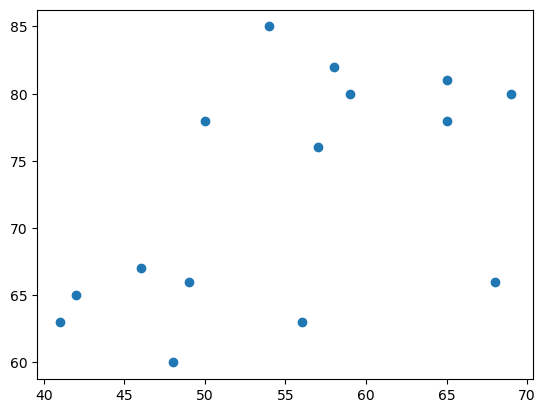

55.13333333333333
72.66666666666667


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/student_scores_em.csv')

df = df[['english', 'mathematics']]
df

# 두 변수가 어떤 연관성이 있는지를 확인하기 위해 
# 눈으로 살펴볼꺼예요 => scatter(산점도)
# x축에는 영어성적, y축에는 수학성적(원래는 ndarray가 들어가야 하는데
# Series를 넣어도 괜찮아요)

plt.scatter(df['english'],
            df['mathematics'])

plt.show()

# 영어성적 평균
print(df['english'].mean()) # 55.13333

# 수학성적 평균
print(df['mathematics'].mean()) # 72.66666666666667

In [ ]:
# scatter를 그려보니
# 수학성적과 영어성적은 함께 증가하거나 함께 감소하는 경향이 보여요!
# -> 양의 상관관계

# 이건 그림을 가지고 두 변수에 대한 관계를 알아보았고,
# 이 관계성을 어떻게 수치화 할 건가요? => 공분산!
# 두 변수가 같이 움직이는 지를 알아볼때 사용하는 대표적인 지표가
# 공분산(covariance) 

# 공분산의 수식은 어떻게 되나요?
# 만약, 영어 점수가 평균보다 높을때 수학점수도 수학점수도 평균보다 높은
# 경우가 많다면 두 변수는 같은 방향으로 움직이는 거고 양의 상관관계

,english,mathematics
0,42,65
1,69,80
2,56,63
3,41,63
4,57,76
5,48,60
6,65,81
7,49,66
8,65,78
9,58,82


In [ ]:
# 영어 점수의 평균 계산
mean_en = df['english'].mean()

# 수학 점수의 평균 계산
mean_math = df['mathematics'].mean()

# 각 학생의 영어 점수에서 평균을 뺀 편차(Deviation) 계산
deviation_en = df['english'] - mean_en

# 각 학생의 수학 점수에서 평균을 뺀 편차(Deviation) 계산
deviation_math = df['mathematics'] - mean_math

# 새로운 컬럼 추가
df['deviation_en'] = deviation_en              # 영어 점수 편차
df['deviation_math'] = deviation_math          # 수학 점수 편차
df['product_deviation'] = df['deviation_en'] * df['deviation_math']  
# 영어 편차 × 수학 편차 (공분산 계산의 분자 부분에 해당)

# 편차의 곱의 평균이 공분산
print(df['product_deviation'].mean()) # 38.84

38.84444444444444


In [ ]:
# 실제로 계산할때는 당연히 numpy, pandas가 제공하는 함수를 이용!
df['english']
df['mathematics']

# np.cov() # 공분산
# np.var() # 분산

print(np.cov(df['english'], df['mathematics'], ddof=0)) # 공분산
'''
[[76.78222222 38.84444444]
 [38.84444444 67.42222222]]
'''
# 결과는 공분산 행렬로 출력

[[76.78222222 38.84444444]
 [38.84444444 67.42222222]]


'\n[[82.26666667 41.61904762]\n [41.61904762 72.23809524]]\n'

In [ ]:
# 실제로 계산할때는 당연히 numpy, pandas가 제공하는 함수를 이용

np.cov(df['english'],
       df['mathematics'],
       ddof=0) # 공분산

# 결과는 공분산 행렬로 출력

# 당연히 pandas도 cov()를 제공. pandas는 항상 불편분산만 계산
# 따라서 우리가 공분산을 계산할 때는 numpy를 이용하는게 좋아요!

In [ ]:
# KOSPI지수
# 삼성전자

# 날짜별로 주가지수를 알아와야 해요 => 라이브러리가 있어요!
# 주가지수를 알아오려면 종목코드를 알아야 해요! => 라이브러리가 있어요!


In [24]:
# 특정 종목에 종목코드를 알아내는 정해져있는 코드
import numpy as np
import pandas as pd

# 전체 종목코드를 읽어온다.(네트워크 연결가능할 경우)
df = pd.read_html("http://kind.krx.co.kr/corpgeneral/corpList.do" + \
                  "?method=download&searchType=13",
                  header=0, 
                  encoding='euc-kr')[0]

# 종목명으로 종목코드 검색
title = "SK하이닉스"  # 종목명
code = "종목코드"   # 종목코드

df = df.loc[:,["회사명","종목코드"]] # 회사명과 종목코드만 추출

df["종목코드"] = df["종목코드"].astype(str).str.zfill(6)

code = df.loc[df["회사명"] == title,"종목코드"].values[0]

print("종목명 : {}, 종목코드 : {}.KS".format(title,code))

/home/kiyong/anaconda3/envs/data_env/lib/python3.10/site-packages/bs4/__init__.py:341: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn(


종목명 : SK하이닉스, 종목코드 : 000660.KS


In [27]:
import numpy as np
import pandas as pd
import yfinance as yf # 설치필요
from  datetime import datetime

start = datetime(2025,1,1) # 특정날짜 객체 생성
end = datetime(2025,9,27)

# Ticker
# ^KS11 : KOSPI 지수
# 005930.KS : 삼성전자

# YAHOO에서 제공하는 KOSPI 지수
df_all = yf.download(["^KS11", "005930.KS"], 
                     start=start, 
                     end=end, 
                     auto_adjust=True)

display(df_all.head())

df_all.dropna(inplace=True)

df_close_KOSPI = df_all["Close"]["^KS11"]
df_close_SE = df_all["Close"]["005930.KS"]

[*********************100%***********************]  2 of 2 completed


Price              Close                       High               \
Ticker         005930.KS        ^KS11     005930.KS        ^KS11   
Date                                                               
2025-01-02  52760.988281  2398.939941  52958.594979  2410.989990   
2025-01-03  53749.023438  2441.919922  54440.646901  2454.669922   
2025-01-06  55231.074219  2488.639893  55527.484277  2489.100098   
2025-01-07  54737.054688  2492.100098  56614.318296  2521.860107   
2025-01-08  56614.320312  2521.050049  56811.927015  2526.770020   

Price                Low                       Open                   Volume  \
Ticker         005930.KS        ^KS11     005930.KS        ^KS11   005930.KS   
Date                                                                           
2025-01-02  51674.151444  2386.840088  52069.364839  2400.870117  16630538.0   
2025-01-03  52168.169807  2402.580078  52168.169807  2402.580078  19318046.0   
2025-01-06  53650.220574  2446.820068  53749.023927  2453.300049  19034284.0   
2025-01-07  54737.054688  2492.090088  56120.301557  2513.489990  17030235.0   
2025-01-08  54045.433178  2481.250000  54144.236529  2481.250000  26593553.0   

Price               
Ticker       ^KS11  
Date                
2025-01-02  350700  
2025-01-03  407500  
2025-01-06  302800  
2025-01-07  407700  
2025-01-08  362900

In [ ]:
# df_close_KOSPI
# df_close_SE
np.cov(df_close_KOSPI,
       df_close_SE,
       ddof=0)

# 공분산 값 : 2366288

array([[  106880.32397652,  2366288.26495299],
       [ 2366288.26495299, 63277519.54649653]])

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/student_scores_em.csv')

df = df[['english', 'mathematics']]

# 공분산 계산하듯이 상관계수도 쉽게 계산할 수 있어요
np.corrcoef(df['english'],
            df['mathematics'])
# 결과는 2차원 matrix로 표현되는데 이걸 상관행렬이라고 해요!
df.corr()

,english,mathematics
english,1.00000,0.53988
mathematics,0.53988,1.00000


In [ ]:
df = pd.read_csv('./data/student_life_data_cleaned.csv')

df_filter = df[['일일공부시간', '수학점수', '영어점수', '과학점수']]

df_filter.corr()

,일일공부시간,수학점수,영어점수,과학점수
일일공부시간,1.000000,0.171220,0.382053,0.321290
수학점수,0.171220,1.000000,0.433930,0.518648
영어점수,0.382053,0.433930,1.000000,0.527876
과학점수,0.321290,0.518648,0.527876,1.000000
